#Debug only

In [1]:
# def dx_imi_mat(x,t,A):
#   c = np.dot(A,x) #c is expected cost of particular stgy
#   phi = np.dot(c,x) #phi is the expected cost of whole pop
#   return x*(phi-c)

In [2]:
# a1=np.array([0.1,0.3,0.6])

In [3]:
# np.dot(A,a1)

In [4]:
# np.dot(A,a1)-np.dot(A,a1)[1]

In [5]:
# np.array([(np.dot(A,a1)-np.dot(A,a1)[i]).clip(0) for i in range(0,len(a1)) ])

In [6]:
# RHS=a1 * np.array([(np.dot(A,a1)-np.dot(A,a1)[i]).clip(0) for i in range(0,len(a1))]).sum(axis=0)

In [7]:
# np.array([a1[i]*(np.dot(A,a1)[i] - np.dot(A,a1)).clip(0) for i in range(0,len(a1))])

In [8]:
# LHS = np.array([a1[i]*(np.dot(A,a1)[i] - np.dot(A,a1)).clip(0) for i in range(0,len(a1))]).sum(axis=0)

In [9]:
# LHS-RHS

#Functions & import

In [10]:
def dx_imi_mat(x,t,A):
  RHS = x * np.array([x[i]*(np.dot(A,x)-np.dot(A,x)[i]).clip(0) for i in range(0,len(x))]).sum(axis=0)
  LHS = x * np.array([x[i]*(np.dot(A,x)[i] - np.dot(A,x)).clip(0) for i in range(0,len(x))]).sum(axis=0)
  return LHS-RHS

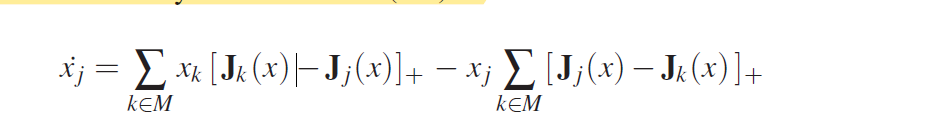

In [11]:
def dx_smi_mat(x,t,A):
  RHS = x * np.array([(np.dot(A,x)-np.dot(A,x)[i]).clip(0) for i in range(0,len(x))]).sum(axis=0)
  LHS = np.array([x[i]*(np.dot(A,x)[i] - np.dot(A,x)).clip(0) for i in range(0,len(x))]).sum(axis=0)
  return LHS-RHS

In [12]:
def plottimeseries(xs,t,title):

  fig, ax = plt.subplots()
  ax.plot(t,xs)
  ax.legend(["strategy "+str(i+1) for i in range(len(xs[0]))])
  ax.set_xlabel('time')
  ax.set_ylabel('fraction of population x_i')
  ax.set_title(title)
  fig.set_size_inches(9, 5)

In [13]:
# a=np.array([[1,2],[3,4]])

In [14]:
def plottimeseries_varystartingpt(xss,t,title,legends):
  """
  only for 2 stgy plotting
  """
  fig, ax = plt.subplots()
  for xs in xss:
    ax.plot(t,xs[:,0])
  ax.legend(["x_0"+i for i in legends])
  ax.set_xlabel('time')
  ax.set_ylabel('x_1')
  ax.set_title(title)
  fig.set_size_inches(9, 5)

In [15]:
def plottimeseries_3simplex(xss,t,title,legends,A, plot_field=False,figsize=9):
  """
  only for 3 stgy plotting
  """
  fig, ax = plt.subplots()
  xj=np.array([]) #Jx vector fields
  yj=np.array([])
  xvj=np.array([])
  yvj=np.array([])

  xt=np.array([]) #Vx=dx/dt vector fields
  yt=np.array([])
  xvt=np.array([])
  yvt=np.array([])

  Axy = np.array([[-np.sqrt(3)/2,0,np.sqrt(3)/2],[-0.5,1,-0.5]]) #mapping from 3x60 deg to xy

  for nu,xs in enumerate(xss):

    a=xs[:,0]
    b=xs[:,1]
    c=xs[:,2]
    x = 0.5 * ( 2.*c+b ) / (a+b+c)
    y = 0.5*np.sqrt(3) * b / (a+b+c)

    if plot_field:
      xj=np.append(xj,x)
      yj=np.append(yj,y)
      xt=np.append(xt,x)
      yt=np.append(yt,y)

      vj=-np.dot(np.dot(Axy,A),xs.T)
      xvj=np.append(xvj,vj[0])
      yvj=np.append(yvj,vj[1])

      xvto=np.gradient(x)
      yvto=np.gradient(y)
      xvt=np.append(xvt, xvto)
      yvt=np.append(yvt, yvto)

    ax.plot(x,y,linewidth=0.5, label="x_0"+legends[nu])

  if plot_field:
    number=50
    xj=[xj[i] for i in range(0,len(xj),number)]
    yj=[yj[i] for i in range(0,len(yj),number)]
    xvj=[xvj[i] for i in range(0,len(xvj),number)]
    yvj=[yvj[i] for i in range(0,len(yvj),number)]
    scale=20
    ax.quiver(xj,yj,xvj,yvj, units='xy',width=0.002,scale=scale, label="-J(x)")
    number=50
    xt=[xt[i] for i in range(0,len(xt),number)]
    yt=[yt[i] for i in range(0,len(yt),number)]
    xvt=[xvt[i] for i in range(0,len(xvt),number)]
    yvt=[yvt[i] for i in range(0,len(yvt),number)]
    scale=0.05
    ax.quiver(xt,yt,xvt,yvt, units='xy',width=0.002,scale=scale,color='r', label="V(x) = dx/dt")

  ax.legend()

  ax.plot([0,0.5,1,0],[0,0.5*np.sqrt(3),0,0],color="black")
  ax.text(0,0,"x_1",ha="right")
  ax.text(0.5,0.5*np.sqrt(3),"x_2")
  ax.text(1,0,"x_3")
  ax.set_title(title)
  ax.axis('off')

  fig.set_size_inches(figsize, figsize*np.sqrt(3)/2)

In [16]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#1.

In [17]:
timestep = 0.0005
endtime = 0.25
A=np.array([[99,0],[0,1]])
y0=np.array([99/100,1/100])
t=np.linspace(0,endtime,int(endtime/timestep))

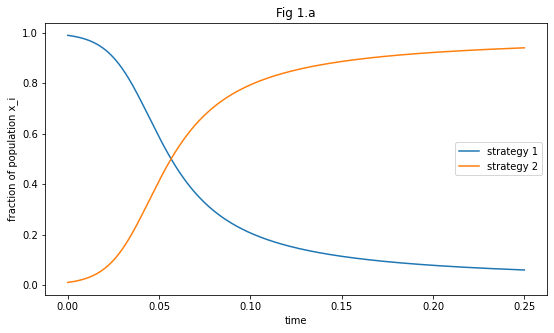

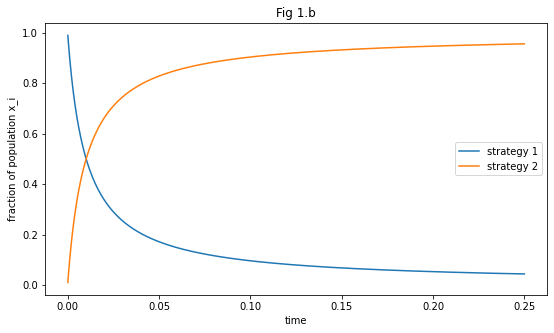

In [18]:
xsa=odeint(func=dx_imi_mat,y0=y0,t=t,args=(A,))
plottimeseries(xsa,t,"Fig 1.a")
xsb=odeint(func=dx_smi_mat,y0=y0,t=t,args=(A,))
plottimeseries(xsb,t,"Fig 1.b")

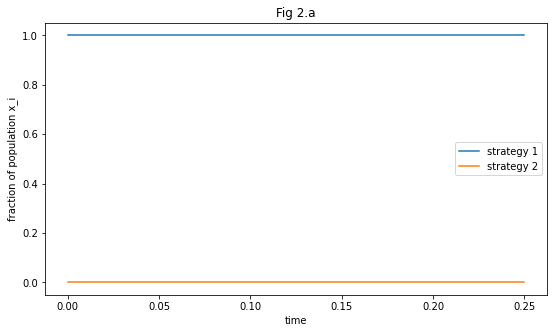

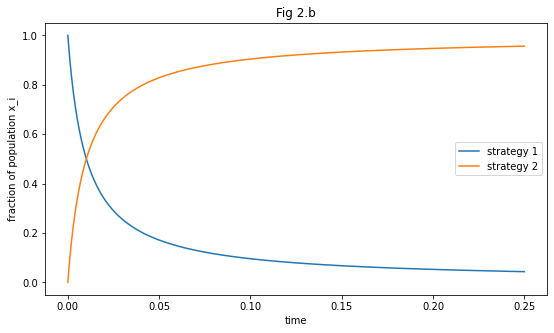

In [19]:
A=np.array([[99,0],[0,1]])
y0=np.array([1,0])
xsc=odeint(func=dx_imi_mat,y0=y0,t=t,args=(A,))
plottimeseries(xsc,t,"Fig 2.a")
xsd=odeint(func=dx_smi_mat,y0=y0,t=t,args=(A,))
plottimeseries(xsd,t,"Fig 2.b")

#2

In [20]:
timestep = 0.005
endtime = 2.5
A=np.array([[-6,0],[0,-4]])
t=np.linspace(0,endtime,int(endtime/timestep))
y0s=np.array([[0.9-0.1*i,0.1*(i+1)] for i in range(9)])
legends = [str(y0) for y0 in y0s]

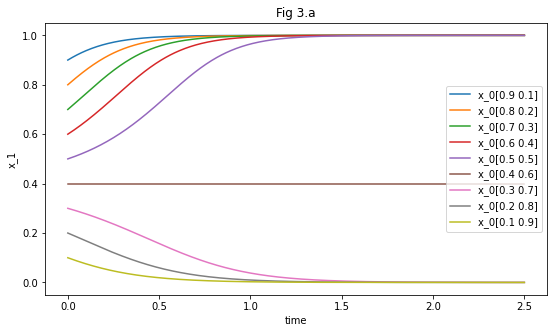

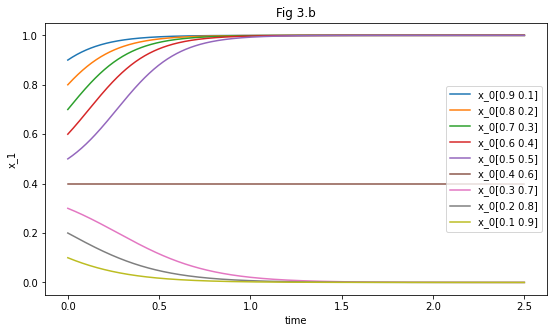

In [21]:
xssa=[odeint(func=dx_imi_mat,y0=y0,t=t,args=(A,)) for y0 in y0s]
plottimeseries_varystartingpt(xssa,t,"Fig 3.a",legends)
xssb=[odeint(func=dx_smi_mat,y0=y0,t=t,args=(A,)) for y0 in y0s]
plottimeseries_varystartingpt(xssb,t,"Fig 3.b",legends)

#3

In [22]:
timestep = 0.01
endtime = 25
y0=[1/2,1/4,1/4]
t=np.linspace(0,endtime,int(endtime/timestep))
A=np.array([[0,-1,1],[1,0,-1],[-1,1,0]])
xs=odeint(func=dx_imi_mat,y0=y0,t=t,args=(A,))

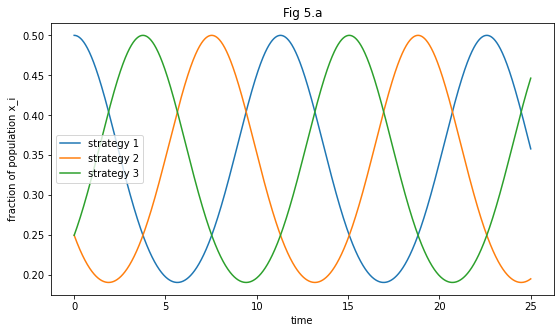

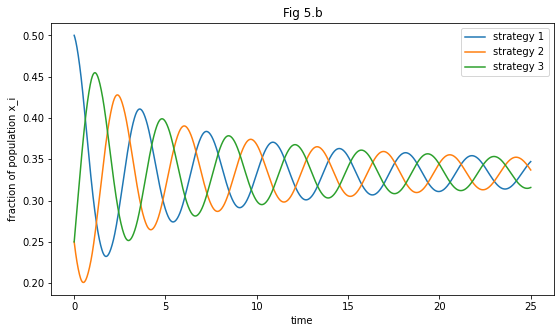

In [23]:
xsa=odeint(func=dx_imi_mat,y0=y0,t=t,args=(A,))
plottimeseries(xsa,t,"Fig 5.a")
xsb=odeint(func=dx_smi_mat,y0=y0,t=t,args=(A,))
plottimeseries(xsb,t,"Fig 5.b")

In [24]:
y0s=np.array([[i,(1-i)/2,(1-i)/2] for i in [0.34,0.4,0.5,0.6,0.7,0.8,0.9]])
legends = [str(y0) for y0 in y0s]

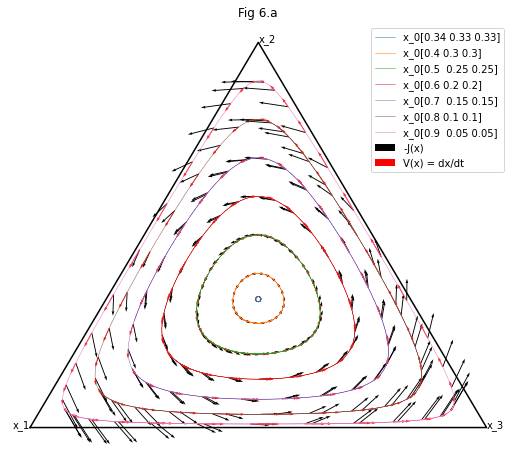

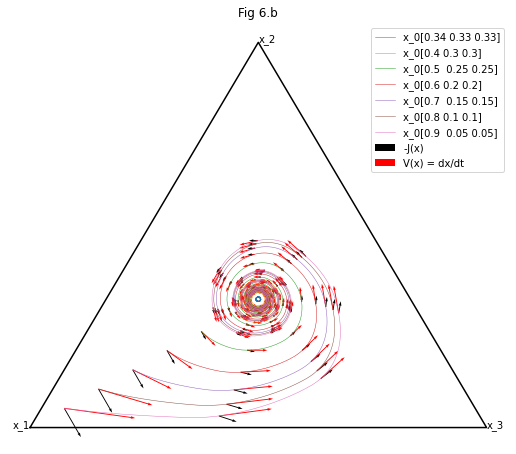

In [25]:
xssa=[odeint(func=dx_imi_mat,y0=y0,t=t,args=(A,)) for y0 in y0s]
plottimeseries_3simplex(xssa,t,"Fig 6.a",legends,A,plot_field=1)
xssb=[odeint(func=dx_smi_mat,y0=y0,t=t,args=(A,)) for y0 in y0s]
plottimeseries_3simplex(xssb,t,"Fig 6.b",legends,A,plot_field=1)

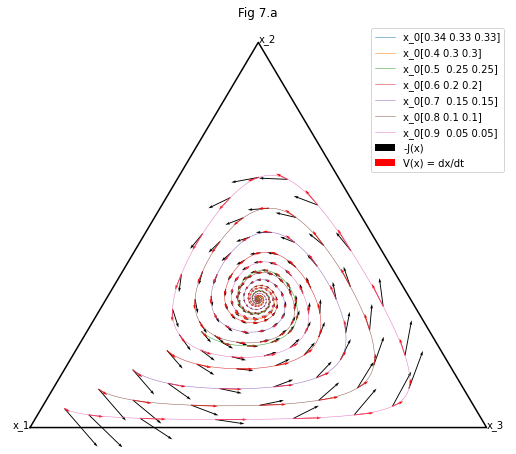

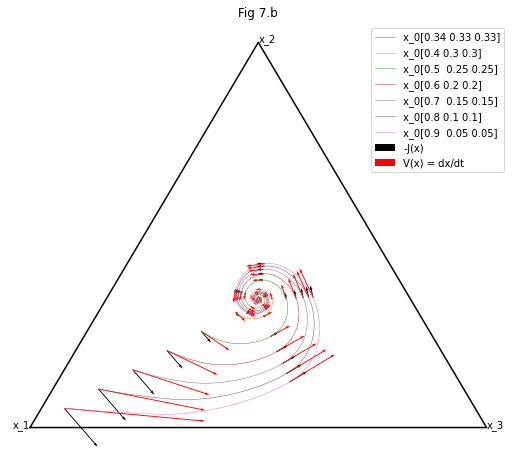

In [30]:
A=np.array([[0,-2,1],[1,0,-2],[-2,1,0]])
xssc=[odeint(func=dx_imi_mat,y0=y0,t=t,args=(A,)) for y0 in y0s]
plottimeseries_3simplex(xssc,t,"Fig 7.a",legends,A,plot_field=1)
xssd=[odeint(func=dx_smi_mat,y0=y0,t=t,args=(A,)) for y0 in y0s]
plottimeseries_3simplex(xssd,t,"Fig 7.b",legends,A,plot_field=1)

#4

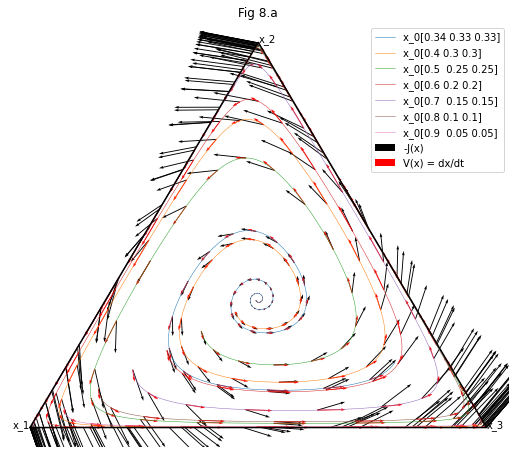

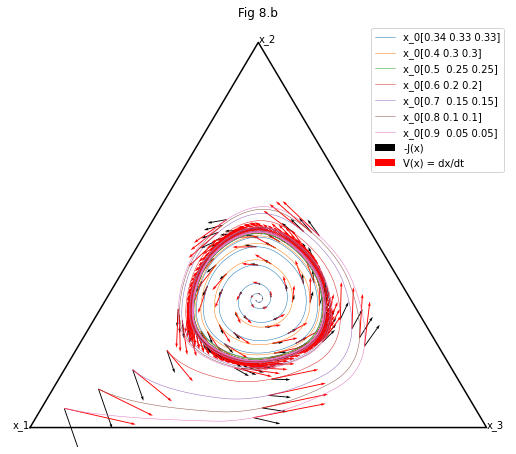

In [32]:
A=np.array([[0,-1,2],[2,0,-1],[-1,2,0]])
xsse=[odeint(func=dx_imi_mat,y0=y0,t=t,args=(A,)) for y0 in y0s]
plottimeseries_3simplex(xsse,t,"Fig 8.a",legends,A,plot_field=1)
xssf=[odeint(func=dx_smi_mat,y0=y0,t=t,args=(A,)) for y0 in y0s]
plottimeseries_3simplex(xssf,t,"Fig 8.b",legends,A,plot_field=1)